In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [3]:
banks = pd.read_csv("Churn_Modelling.csv")
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
banks.isnull().sum()
#checks if there is any null data set that is present in the file

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

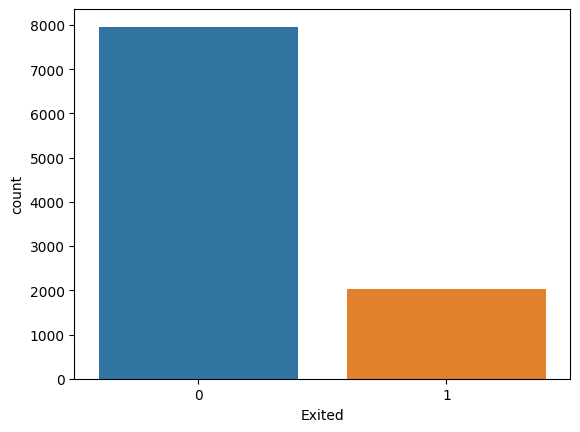

In [8]:
sns.countplot(x = 'Exited', data = banks)

<Axes: xlabel='IsActiveMember', ylabel='count'>

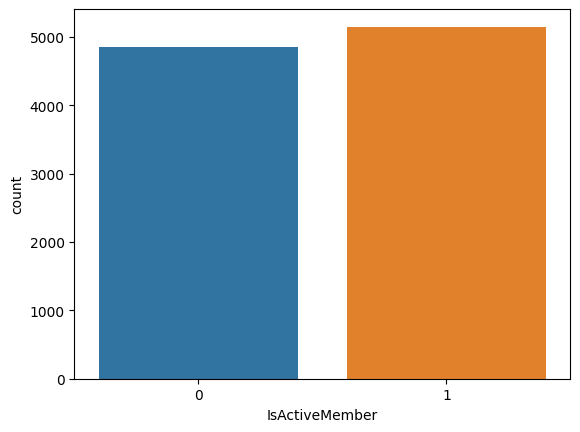

In [9]:
sns.countplot(x = 'IsActiveMember', data = banks)

<Axes: xlabel='HasCrCard', ylabel='count'>

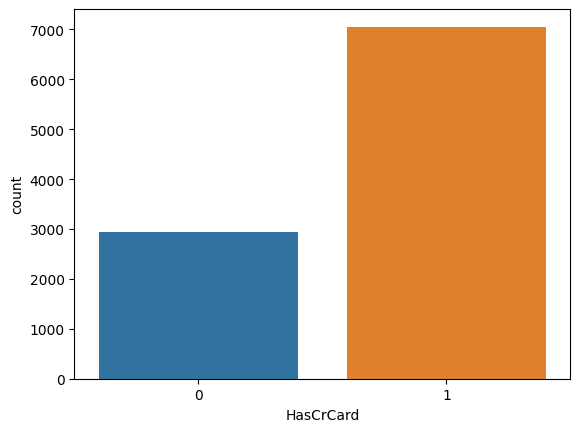

In [10]:
sns.countplot(x = 'HasCrCard', data = banks)


<Axes: xlabel='Gender', ylabel='count'>

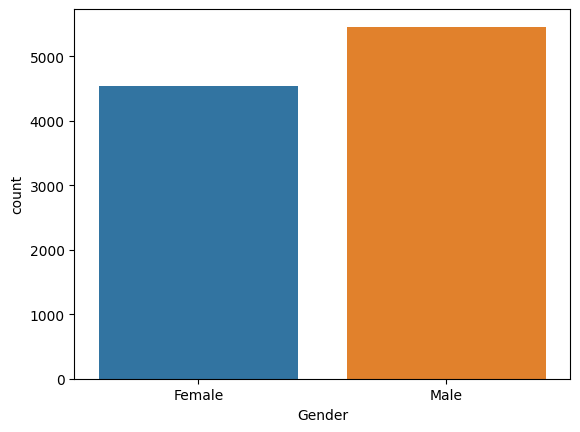

In [11]:
sns.countplot(x = 'Gender', data = banks)


<Axes: xlabel='Geography', ylabel='count'>

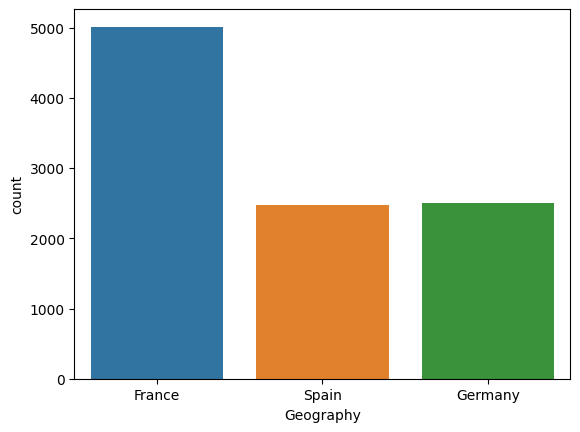

In [12]:
sns.countplot(x = 'Geography', data = banks)


<Axes: xlabel='NumOfProducts', ylabel='count'>

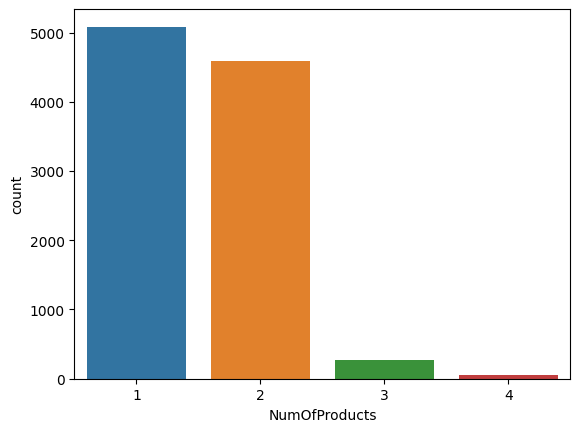

In [15]:
sns.countplot(x = 'NumOfProducts', data = banks)


In [13]:
banks.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

<Axes: xlabel='Tenure', ylabel='count'>

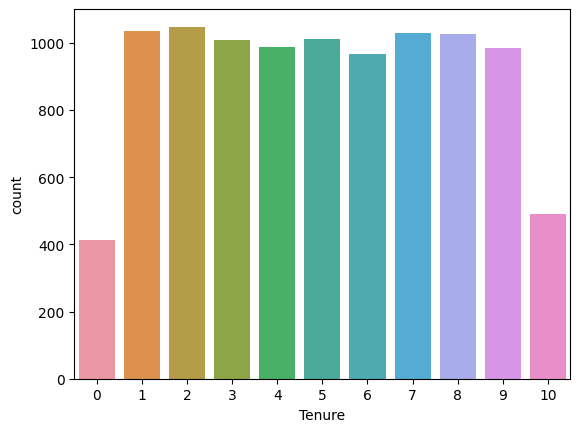

In [14]:
sns.countplot(x = 'Tenure', data = banks)


In [16]:
#everything before this was statistical analysis
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
banks['Geography'] = label_encoder.fit_transform(banks['Geography'])
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
banks['Gender'] = label_encoder.fit_transform(banks['Gender'])
banks.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


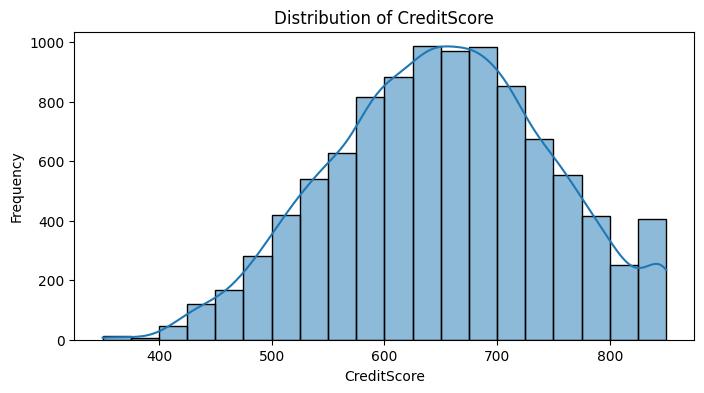

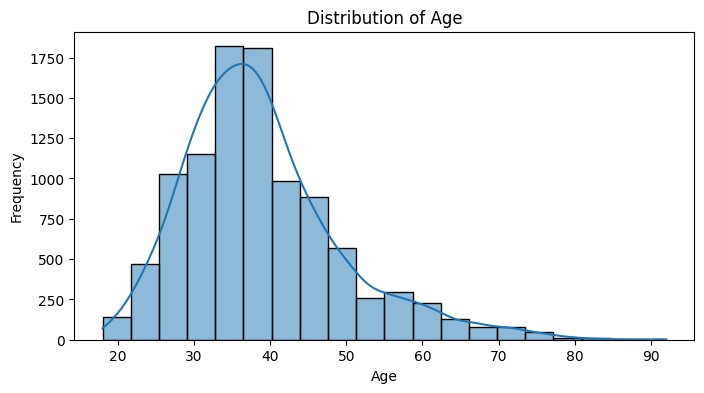

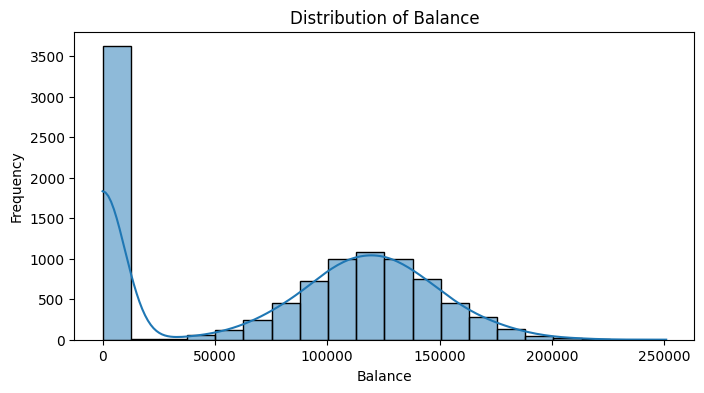

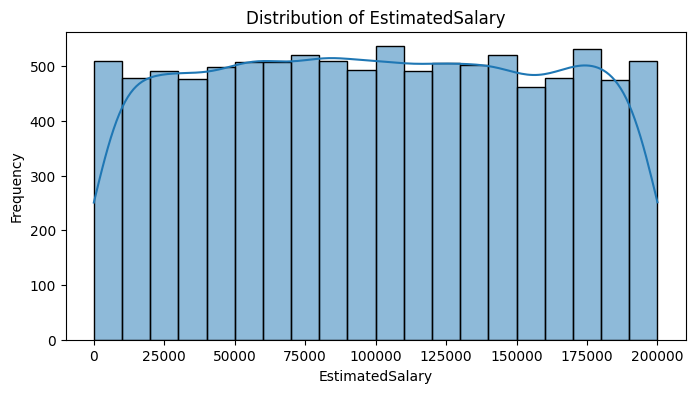

In [18]:
import matplotlib.pyplot as plt
col_dis = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for col in col_dis:
    plt.figure(figsize=(8, 4))
    sns.histplot(banks[col], bins = 20, kde = True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()  

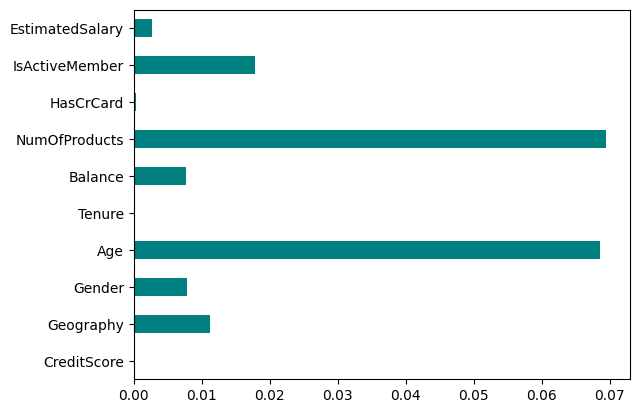

In [19]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
x = banks.drop(['RowNumber','CustomerId','Surname', 'Exited'], axis = 1)
y = banks['Exited']
importance = mutual_info_classif(x,y)
feat_imp = pd.Series(importance, banks.columns[3:len(banks.columns)-1])
feat_imp.plot(kind = 'barh', color = 'teal')
plt.show()
#feature selection

In [20]:
correlation_matrix = x.corr()

selected_features = correlation_matrix.iloc[:, 0].sort_values(ascending=False)[:6]

print(selected_features)

CreditScore       1.000000
IsActiveMember    0.025651
NumOfProducts     0.012238
Geography         0.007888
Balance           0.006268
Tenure            0.000842
Name: CreditScore, dtype: float64


In [27]:
#importing all the algorithms
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [28]:
#creating objects for the algorithms
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lg = LogisticRegression()
rfc = RandomForestClassifier()
dt= DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc= SVC()
gbc = GradientBoostingClassifier()
#for voting .
clfs = {
    'gaussianNB': gnb,
    'multinomialNB': mnb,
    'bernoulliNB': bnb,
    'legistic regression':lg,
    'randomforest':rfc,
    'decisontree':dt,
    'knn':knn,
    'supportvectorMachine':svc,
    'gradientBoostingClassifier':gbc

}

In [29]:
features = banks[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
target = banks['Exited']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(features, target, test_size = 0.20 , random_state = 42)
#the ratio of data is 20 percent for testing and 80 percent for training#

In [33]:
#creating a funtion that can train models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [34]:
accuracy_scores = [] #array of accuracy score
precision_scores = [] #array of precion score
#for loop to run and calculate precision and accuracy score of all the model
for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy*100)
    print("Precision - ",current_precision*100)
    print("-----------")
    #appended and stored in the arrays
    accuracy_scores.append(current_accuracy*100)
    precision_scores.append(current_precision*100)

For  gaussianNB
Accuracy -  79.0
Precision -  33.33333333333333
-----------
For  multinomialNB
Accuracy -  53.5
Precision -  22.404933196300103
-----------
For  bernoulliNB
Accuracy -  80.35
Precision -  0.0
-----------
For  legistic regression
Accuracy -  80.05
Precision -  45.16129032258064
-----------


C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  randomforest
Accuracy -  86.7
Precision -  76.79324894514767
-----------
For  decisontree
Accuracy -  78.7
Precision -  46.420824295010846
-----------
For  knn
Accuracy -  76.4
Precision -  24.18300653594771
-----------


C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  supportvectorMachine
Accuracy -  80.35
Precision -  0.0
-----------
For  gradientBoostingClassifier
Accuracy -  86.55000000000001
Precision -  75.40983606557377
-----------


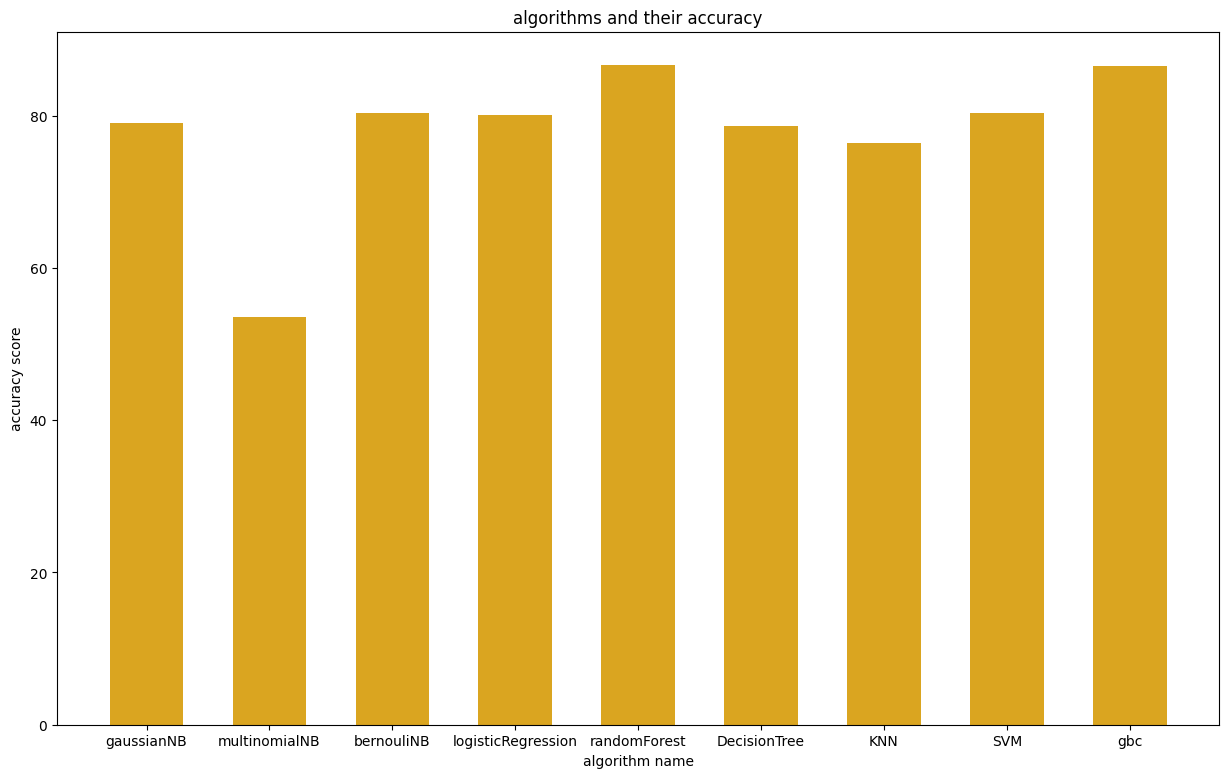

In [35]:
#creating bar graphs for accuracy of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis, accuracy_scores,width=.6,color='goldenrod',edgecolor='none')
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')
plt.show()

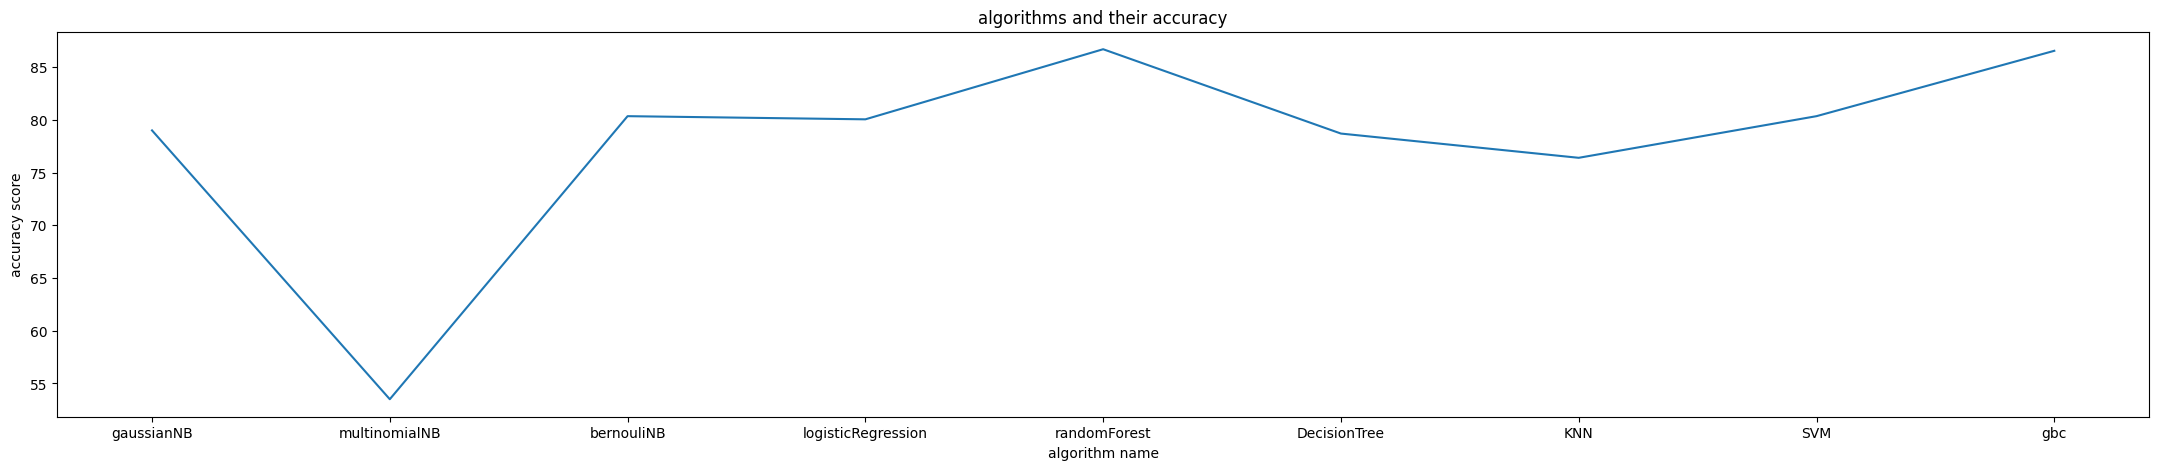

In [36]:
#creating graphs for accuracy of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,accuracy_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('accuracy score')

plt.show()

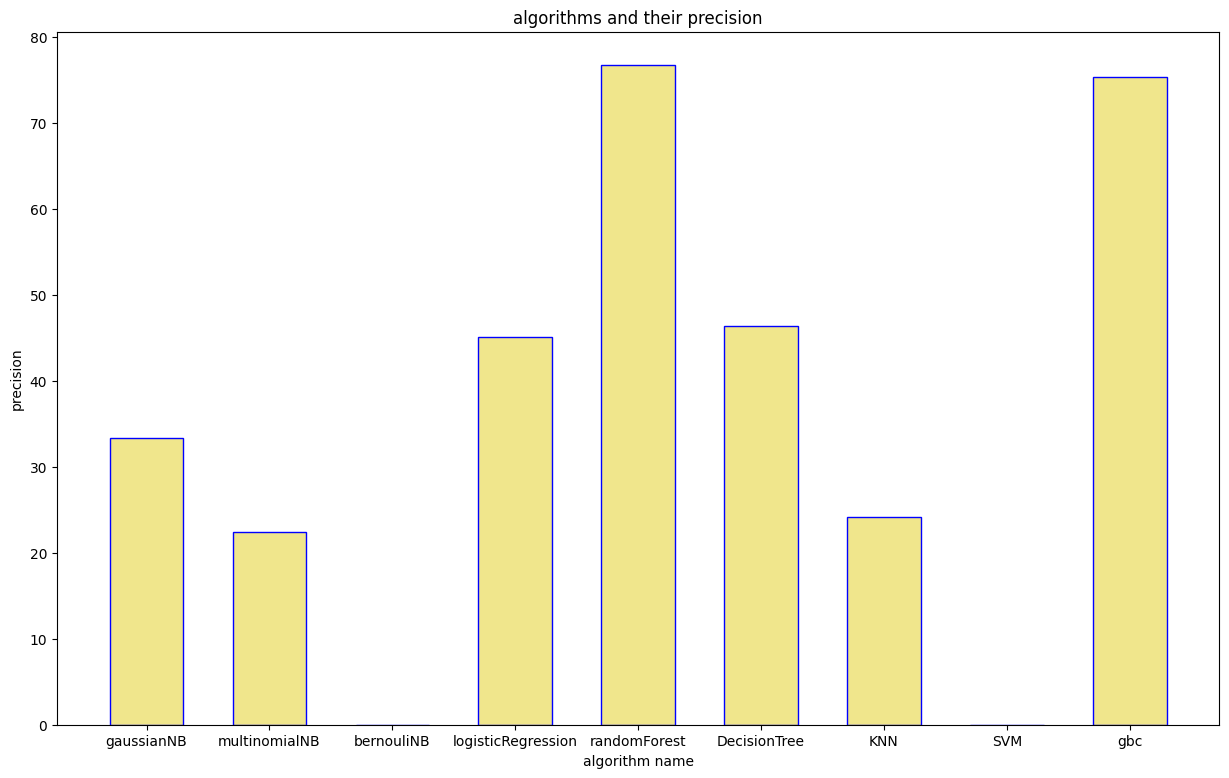

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [37]:
#creating bar graphs for precision of all the models
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.bar(x_axis,precision_scores,width=.6,color='khaki',edgecolor='blue')
plt.title('algorithms and their precision')
plt.xlabel('algorithm name')
plt.ylabel('precision')
plt.show()
plt.figure(figsize=(8,5))

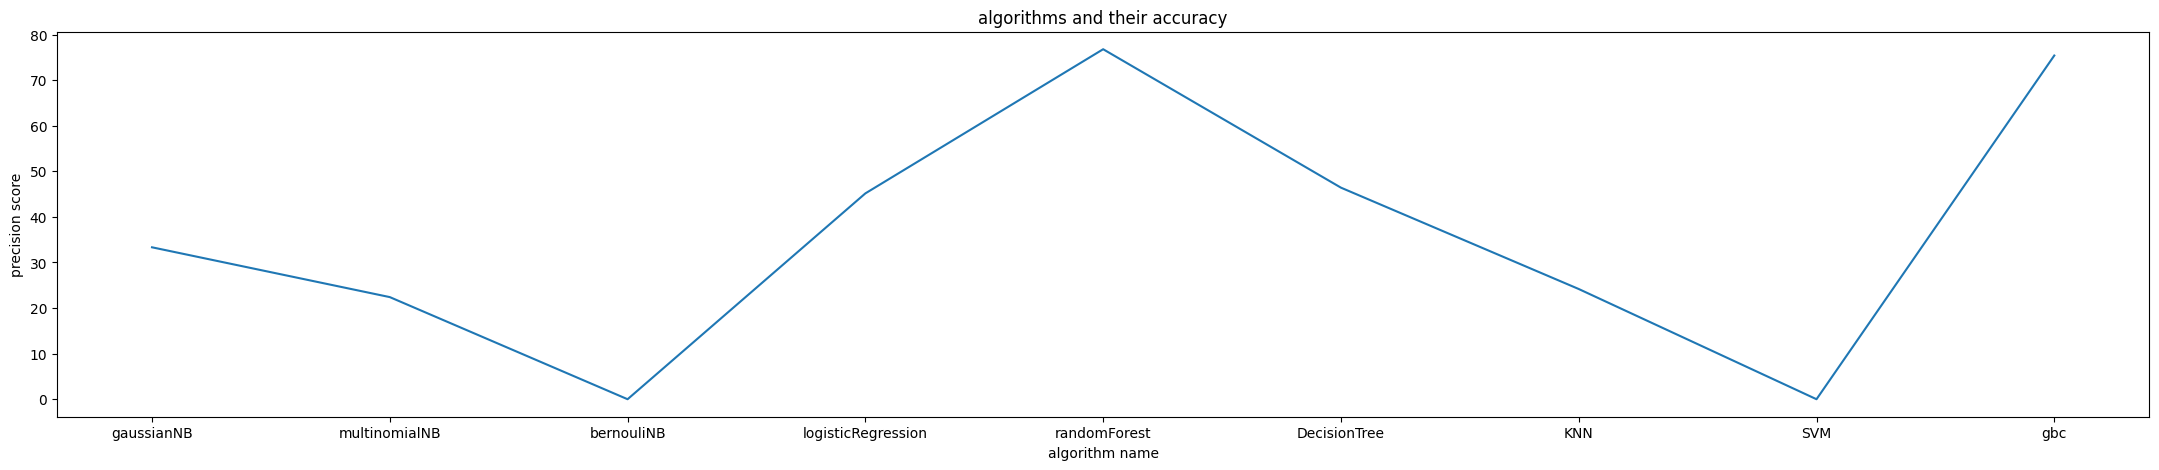

In [38]:
#creating graphs for precison of all the models
x_axis = ['gaussianNB', 'multinomialNB', 'bernouliNB','logisticRegression','randomForest','DecisionTree','KNN','SVM','gbc' ]
plt.figure(figsize=(27,5))
plt.plot(x_axis,precision_scores )
plt.title('algorithms and their accuracy')
plt.xlabel('algorithm name')
plt.ylabel('precision score')
plt.show()

In [39]:
#creating a dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [40]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [41]:
performance_df1

,Algorithm,variable,value
0,randomforest,Accuracy,86.700000
1,gradientBoostingClassifier,Accuracy,86.550000
2,decisontree,Accuracy,78.700000
3,legistic regression,Accuracy,80.050000
4,gaussianNB,Accuracy,79.000000
5,knn,Accuracy,76.400000
6,multinomialNB,Accuracy,53.500000
7,bernoulliNB,Accuracy,80.350000
8,supportvectorMachine,Accuracy,80.350000
9,randomforest,Precision,76.793249


C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


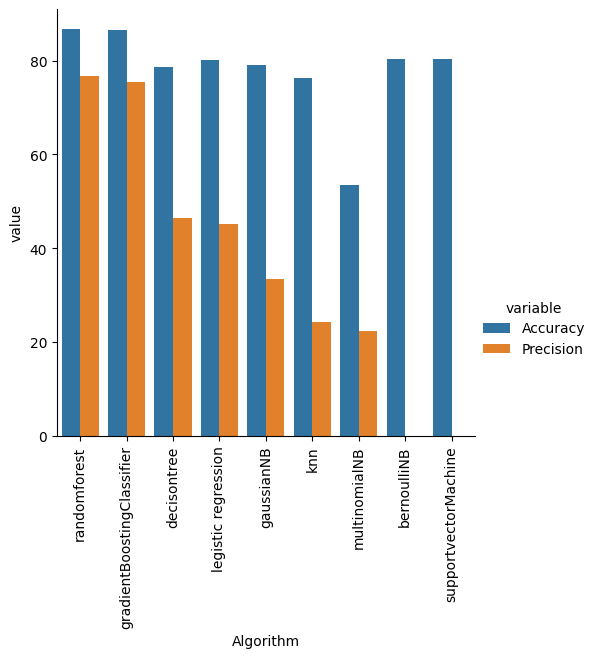

In [42]:
#comparing the the precision score and the accuracy score of all the models and selecting a model\
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#here from this graph we can see that random forest is the best algorithm here 